In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
# Load the datasets:
df_gt = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/input_ready/one-hot-encoded_validation_Owls.csv')
df_BN = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/BN_model_s1_t0.01/bn_predicted_labels_Owls.csv')
df_model0 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01/model0_predicted_labels_Owls.csv')
df_model1 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_1_0218/m1_predicted_labels_Owls.csv')
df_model2 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_2_0311/m2_predicted_labels_Owls.csv')
df_model3 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_3_strong-neg_0331/m3_strong-neg_predicted_labels_Owls.csv')
df_model4 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_4_04282025/m4_predicted_labels_Owls.csv')
df_model5 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_5_05232025/m5_predicted_labels_Owls.csv')
df_model6 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_6_05272025/m6_predicted_labels_Owls.csv')
df_model7 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_7_05302025/m7_predicted_labels_Owls.csv')
df_model8 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_8_06072025/m8_predicted_labels_Owls.csv')
df_model9 = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_9_old-params_06132025/m9_old-params_predicted_labels_Owls.csv')
df_model9_autotune = pd.read_csv('/mnt/d/retraining_BirdNET_2025/model_test/results/model_9_06102025/m9_predicted_labels_Owls.csv')

In [3]:
# I will create a dict to manually set the color for each owl

color = {
    'Buff-fronted Owl': 'firebrick',
    'Striped Owl_call': 'darkgoldenrod',
    'Striped Owl_song': 'goldenrod',
    'Stygian Owl_call': 'olivedrab',
    'Stygian Owl_song': 'yellowgreen',
    'Burrowing Owl_call':'turquoise',
    'Burrowing Owl_song': 'lightseagreen',
    'Black-banded Owl': 'darkorange',
    'Mottled Owl_call': 'plum',
    'Mottled Owl_song': 'violet',
    'Ferruginous Pygmy-Owl': 'mediumslateblue',
    'Black-capped Screech-Owl': 'limegreen',
    'Tropical Screech-Owl': 'forestgreen',
    'Long-tufted Screech-Owl': 'olive',
    'Tawny-browed Owl': 'cornflowerblue',
    'Rusty-barred Owl_call': 'mediumvioletred',
    'Rusty-barred Owl_call1': 'deeppink',
    'Rusty-barred Owl_song': 'hotpink',
    'Barn Owl': 'teal'
}

In [4]:
def plot_pr_curves_per_class(df_gt, model_outputs, model_names, color):
    """
    Plots PR curves for each owl class across multiple model iterations.

    """
    owl_classes = df_gt.columns[3:]  # The first 3 columns are file/start/end

    for class_name in owl_classes:
        class_color = color[class_name]
        
        plt.figure(figsize=(8, 6))
        
        for df_model, model in zip(model_outputs, model_names):
            y_true = df_gt[class_name].values
            y_score = df_model[class_name].values
            
            try:
                precision, recall, _ = precision_recall_curve(y_true, y_score)
                # Variation in alpha per model
                alpha = 0.2 + 0.9 * (model_names.index(model) / len(model_names))
                plt.plot(recall, precision, label=model, color=class_color, alpha=alpha)
            except ValueError:
                continue  # e.g., skip if only 0s or 1s in y_true
        
        plt.title(f'PR Curve - {class_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.legend(title='Model')
        plt.tight_layout()
        plt.show()

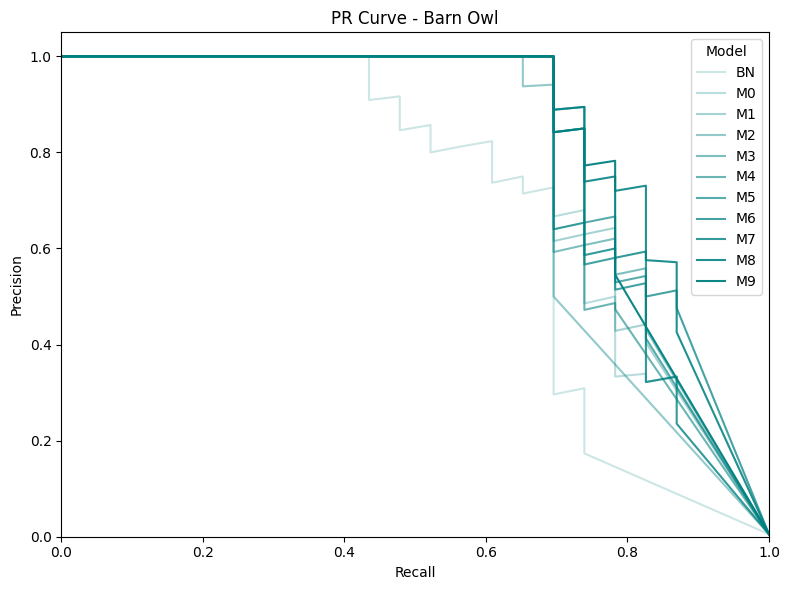

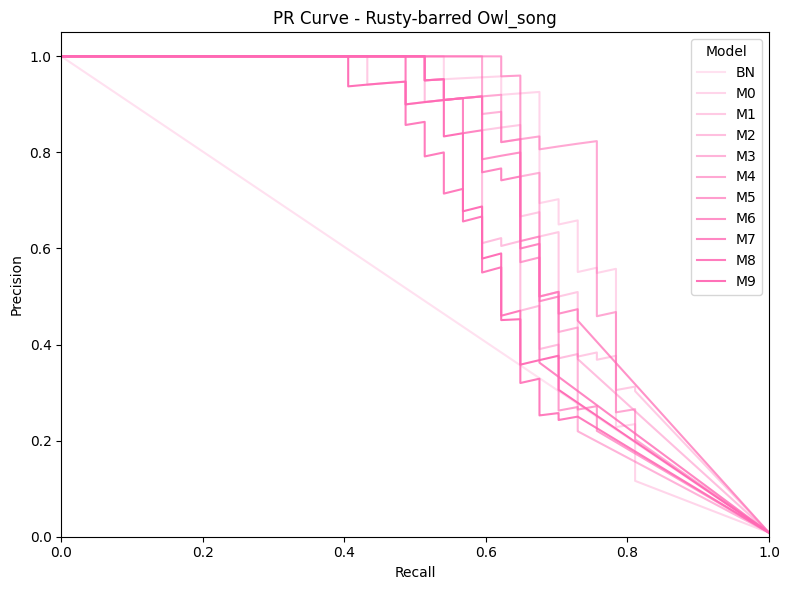

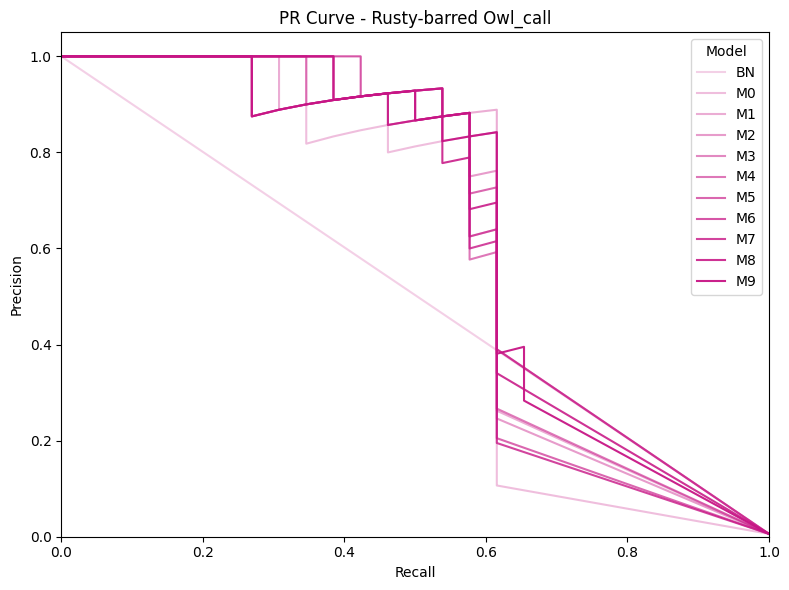

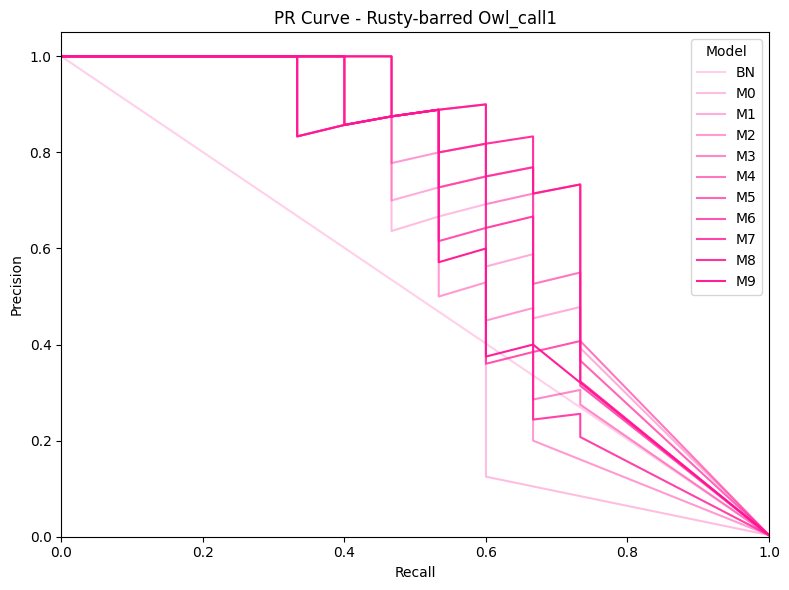

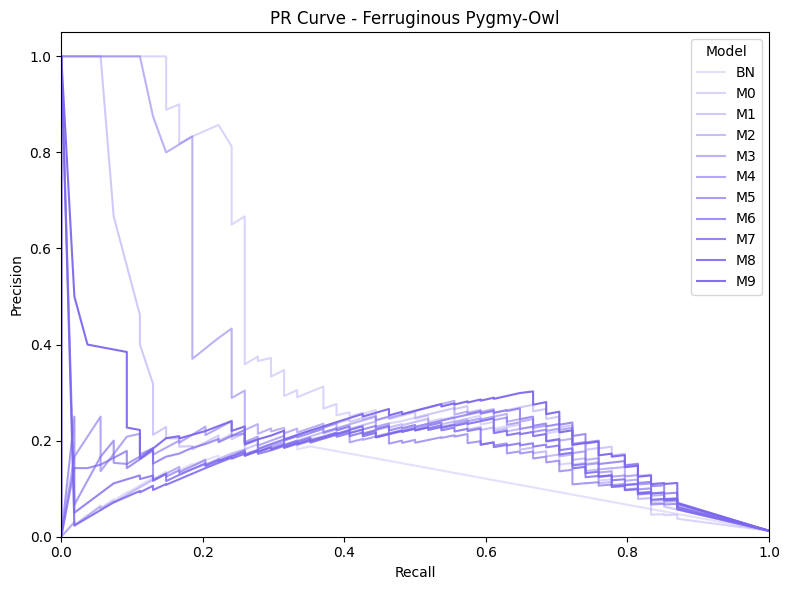

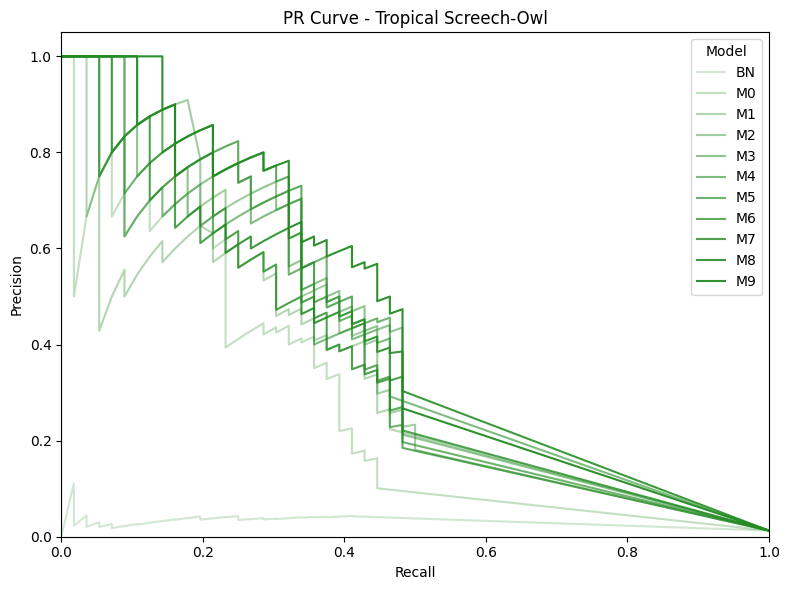

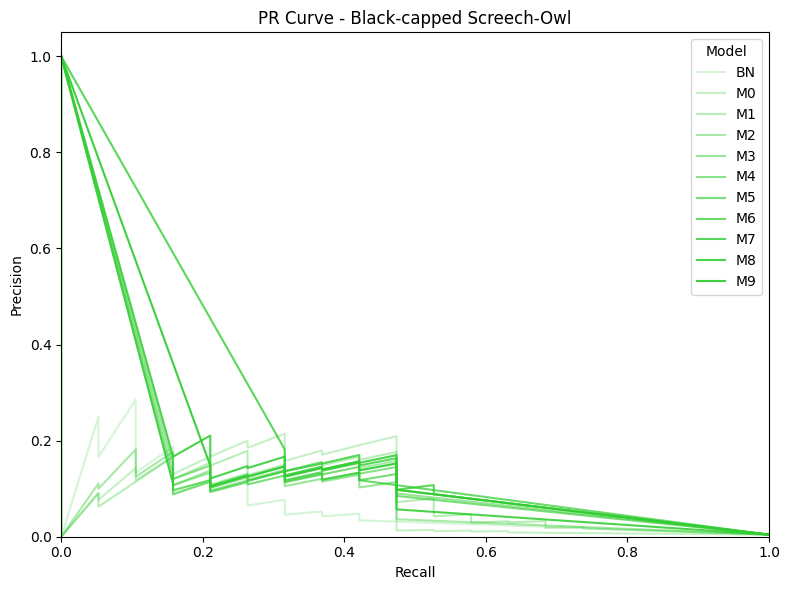

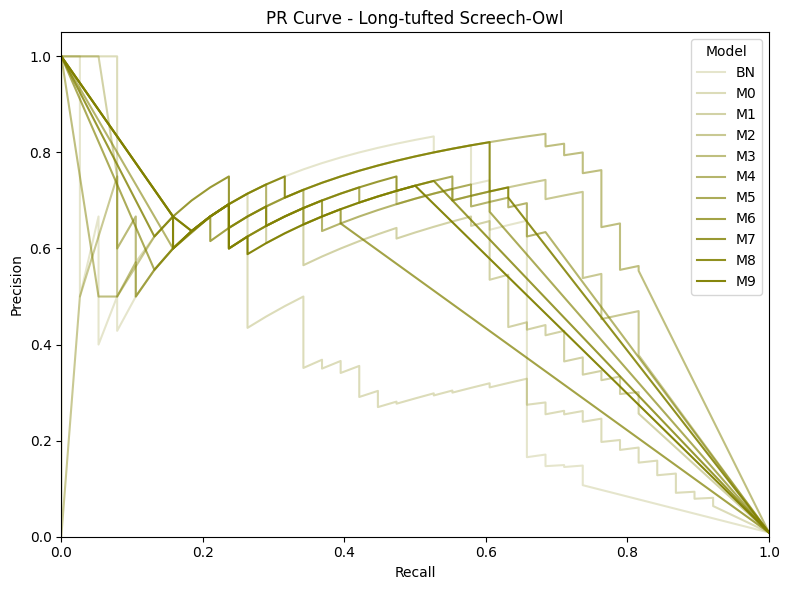

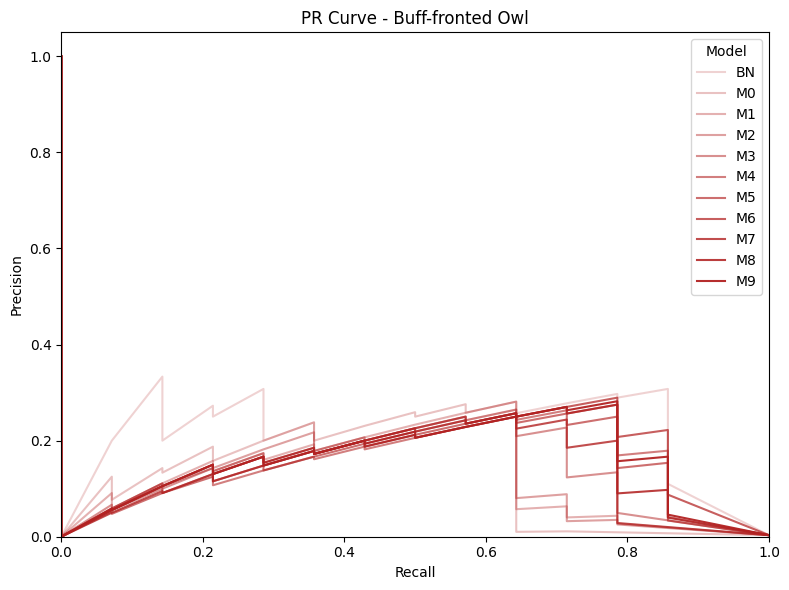

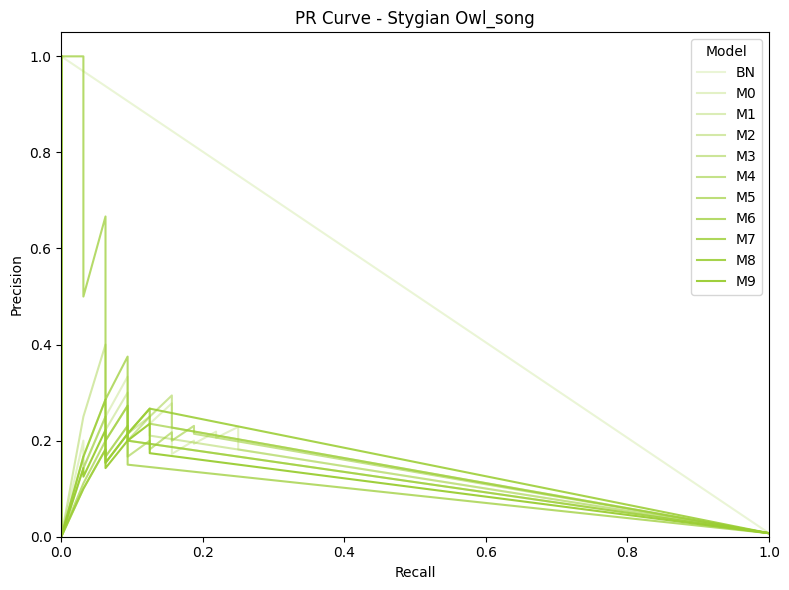

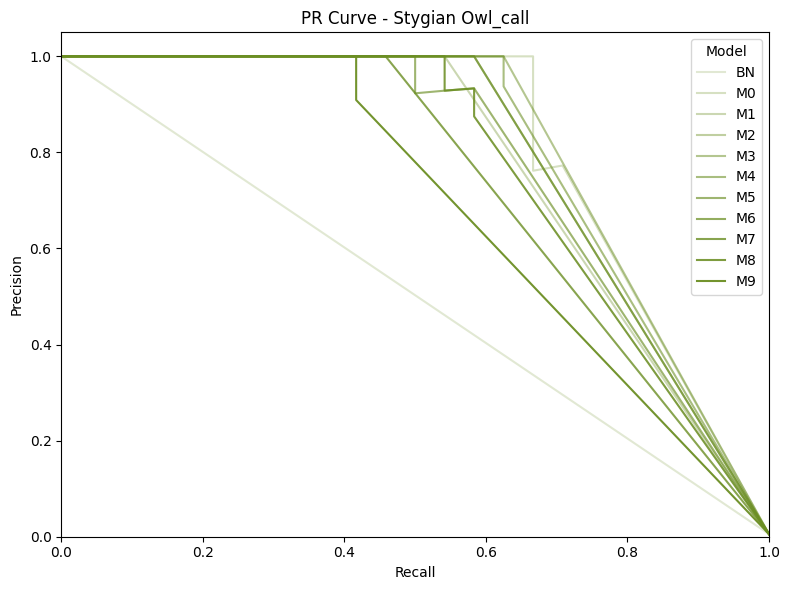

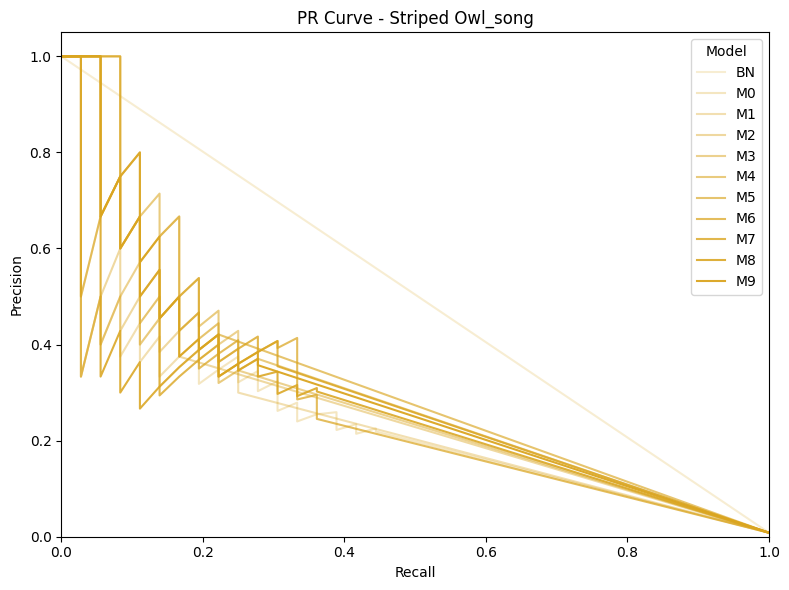

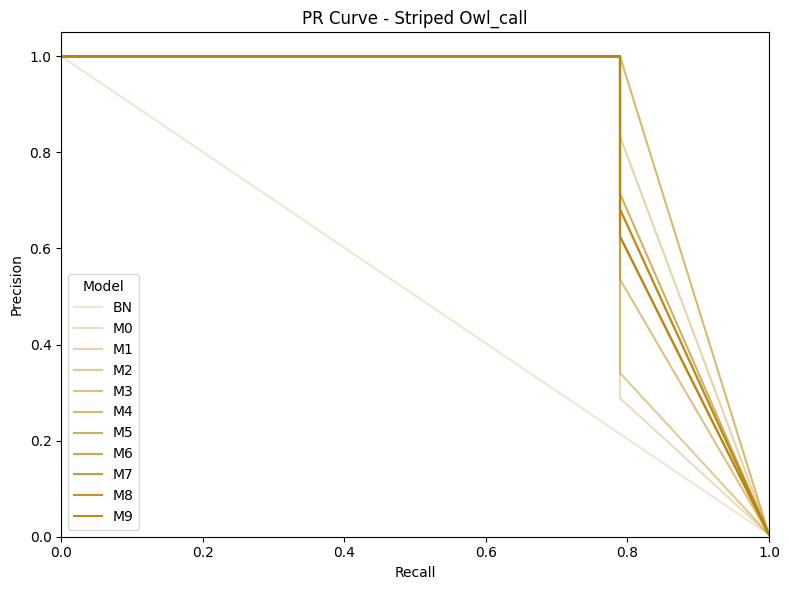

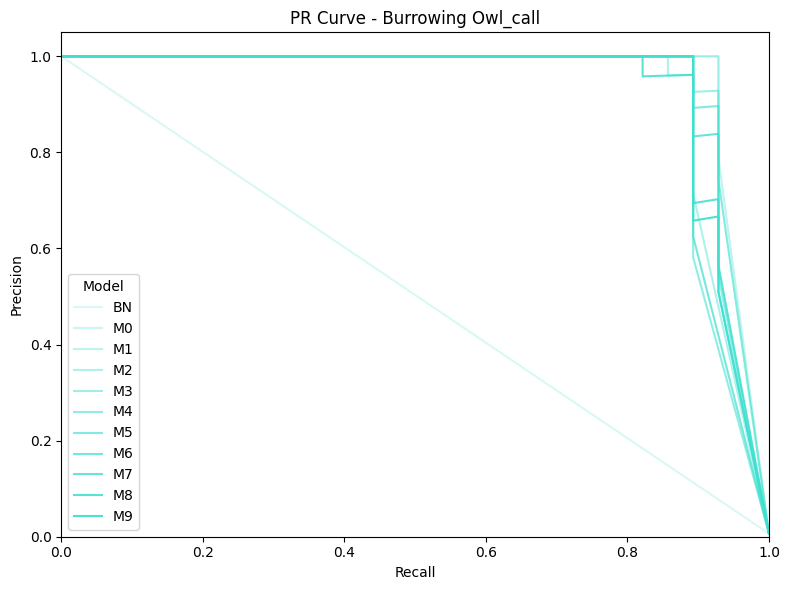

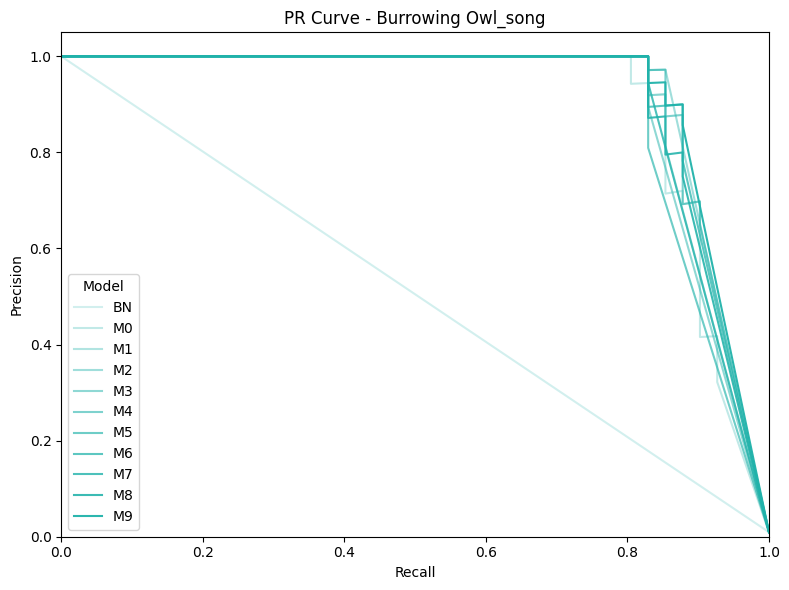

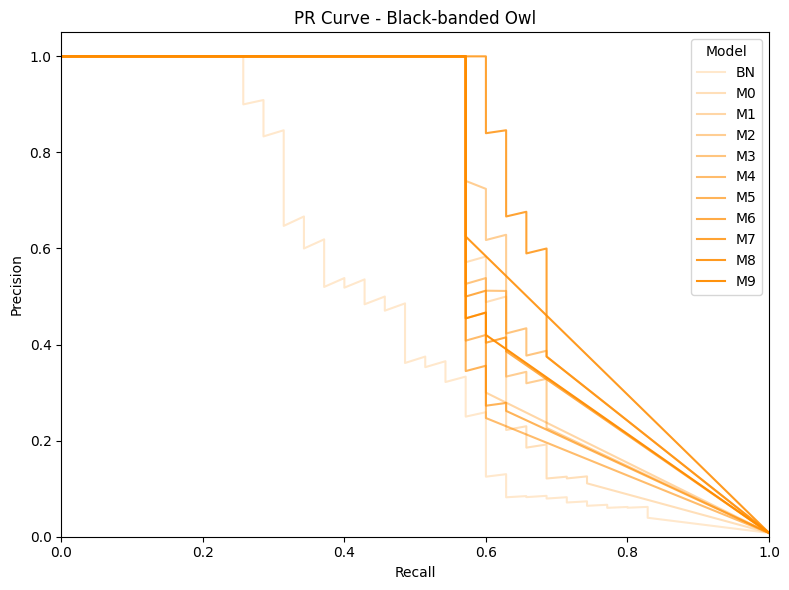

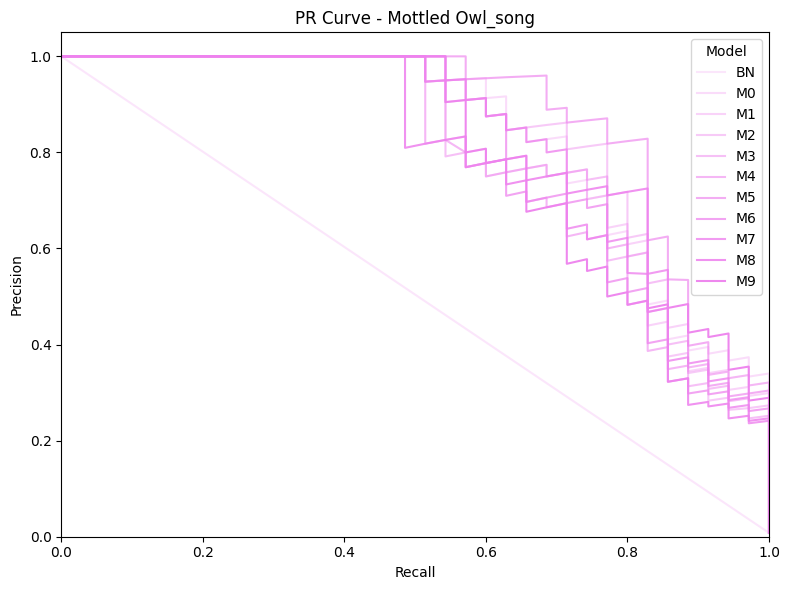

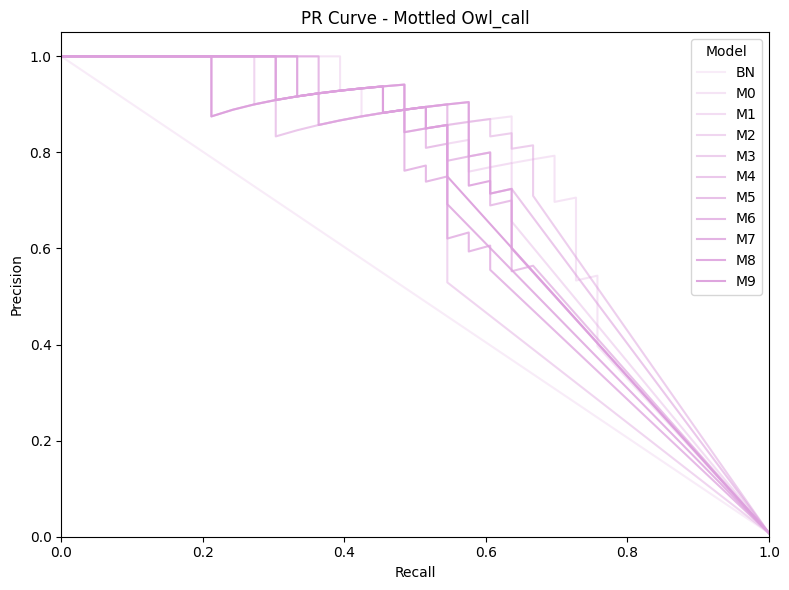

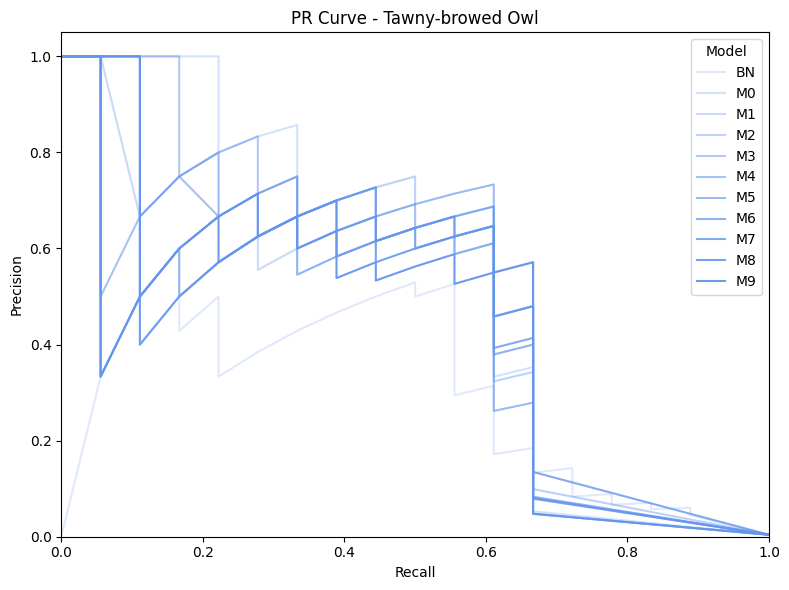

In [5]:
# Run

model_outputs = [df_BN, df_model0, df_model1, df_model2, df_model3, df_model4, df_model5, df_model6, df_model7, df_model8, df_model9, df_model9_autotune]
model_names = ['BN', 'M0', 'M1', 'M2', 'M3', 'M4','M5','M6', 'M7', 'M8', 'M9', 'M9_autotune']

plot_pr_curves_per_class(df_gt, model_outputs, model_names, color)